In \[6\]:

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings

    # 1. SETUP
    # ------------------------------------------
    warnings.filterwarnings('ignore')
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (10, 6)

In \[7\]:

    # 2. LOAD DATASET
    # ------------------------------------------
    # We load the file directly. If this fails, the file is not uploaded correctly.
    df = pd.read_csv('online_retail_II.csv', encoding='ISO-8859-1')

    print("✅ Data loaded successfully.")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")

    ✅ Data loaded successfully.
       Shape: (525461, 8)
       Columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

In \[8\]:

    # 3. DATA CLEANING
    # ------------------------------------------
    print("\n--- STEP 2: DATA CLEANING ---")

    # Create a copy
    df_clean = df.copy()

    # A. Drop missing Customer ID
    df_clean = df_clean.dropna(subset=['Customer ID'])

    # B. Remove Returns (Negative Quantity) and Invalid Prices
    df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['Price'] > 0)]

    # C. Calculate TotalPrice
    df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['Price']

    # D. Date Conversion (Using dayfirst=True for UK format)
    print("   Converting dates... (this may take a moment)")
    df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], dayfirst=True)

    print("✅ Data cleaning complete.")
    print(f"   Final Clean Shape: {df_clean.shape}")

    --- STEP 2: DATA CLEANING ---
       Converting dates... (this may take a moment)
    ✅ Data cleaning complete.
       Final Clean Shape: (407664, 9)

In \[9\]:

    # 4. EXPLORATORY DATA ANALYSIS (EDA)
    # ------------------------------------------
    print("\n--- STEP 3: GENERATING CHARTS ---")

    # Chart 1: Revenue Trend
    print("   1. Plotting Revenue Over Time...")
    monthly_rev = df_clean.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

    plt.figure()
    plt.plot(monthly_rev.index, monthly_rev.values, marker='o', color='#1f77b4')
    plt.title('Monthly Revenue Trend')
    plt.ylabel('Total Revenue (£)')
    plt.grid(True)
    plt.show()

    # Chart 2: Basket Size
    print("\n   2. Plotting Basket Sizes...")
    basket_sizes = df_clean.groupby('Invoice')['Quantity'].sum()

    plt.figure()
    plt.hist(basket_sizes[basket_sizes < 100], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Basket Sizes')
    plt.xlabel('Items per Invoice')
    plt.show()

    # Chart 3: Top Products
    print("\n   3. Plotting Top 10 Products...")
    top_products = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

    plt.figure()
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title('Top 10 Products by Revenue')
    plt.show()

    # Chart 4: Top Countries
    print("\n   4. Plotting Revenue by Country...")
    country_rev = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=country_rev.values, y=country_rev.index, palette='magma')
    plt.title('Top 5 Countries by Revenue')
    plt.show()

    # Chart 5: Customer Loyalty
    print("\n   5. Plotting Customer Frequency...")
    customer_freq = df_clean.groupby('Customer ID')['Invoice'].nunique()

    plt.figure()
    plt.hist(customer_freq, bins=50, range=(0, 20), color='salmon', edgecolor='black')
    plt.title('Purchase Frequency per Customer')
    plt.xlabel('Number of Purchases')
    plt.show()

    --- STEP 3: GENERATING CHARTS ---
       1. Plotting Revenue Over Time...

![No description has been provided for this
image](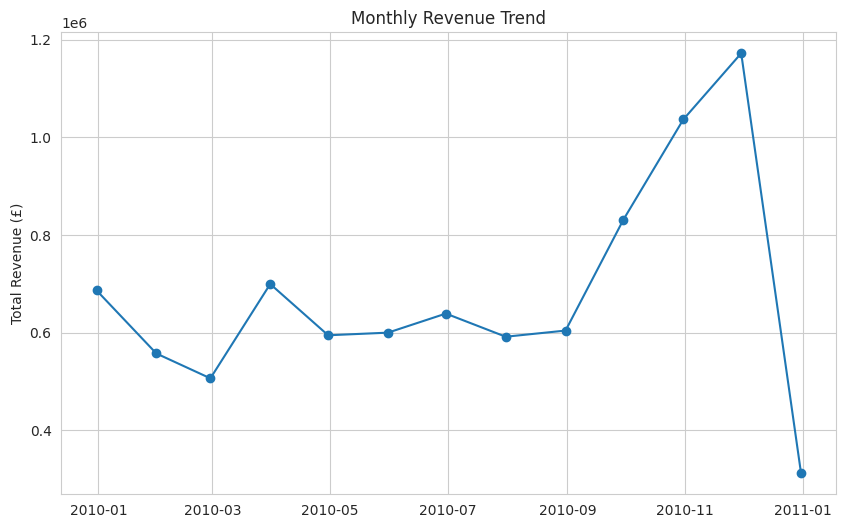%0A)

       2. Plotting Basket Sizes...

![No description has been provided for this
image](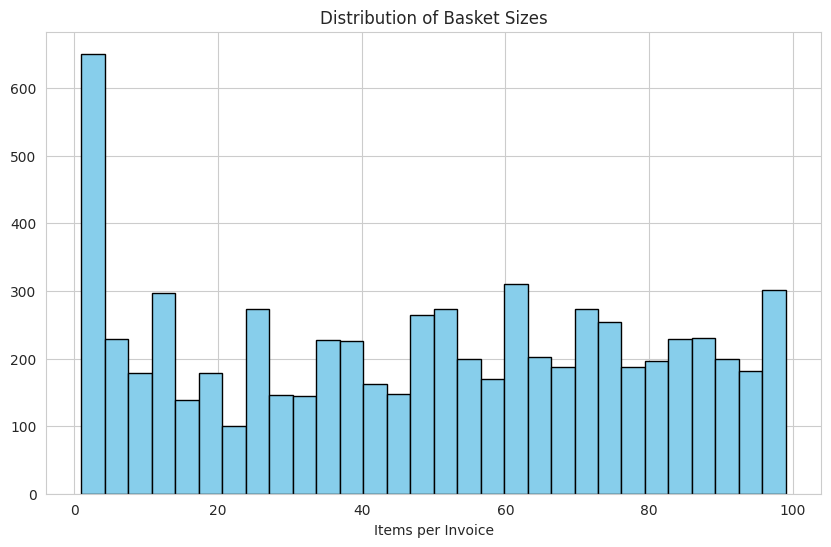%0A)

       3. Plotting Top 10 Products...

![No description has been provided for this
image](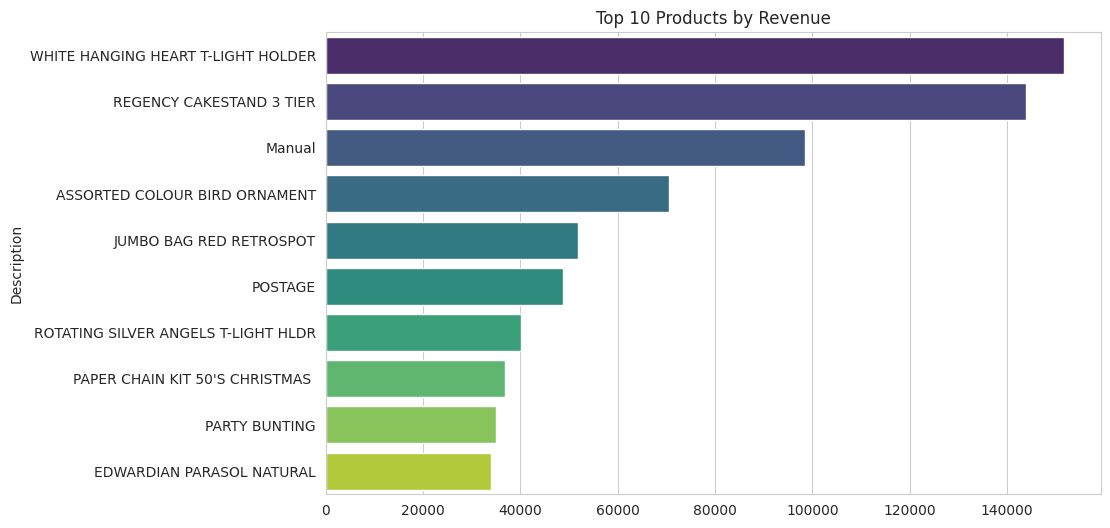%0A)

       4. Plotting Revenue by Country...

![No description has been provided for this
image](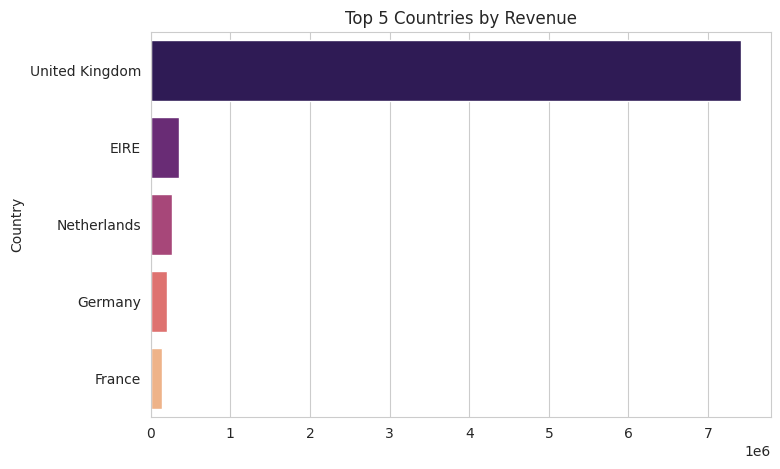%0A)

       5. Plotting Customer Frequency...

![No description has been provided for this
image](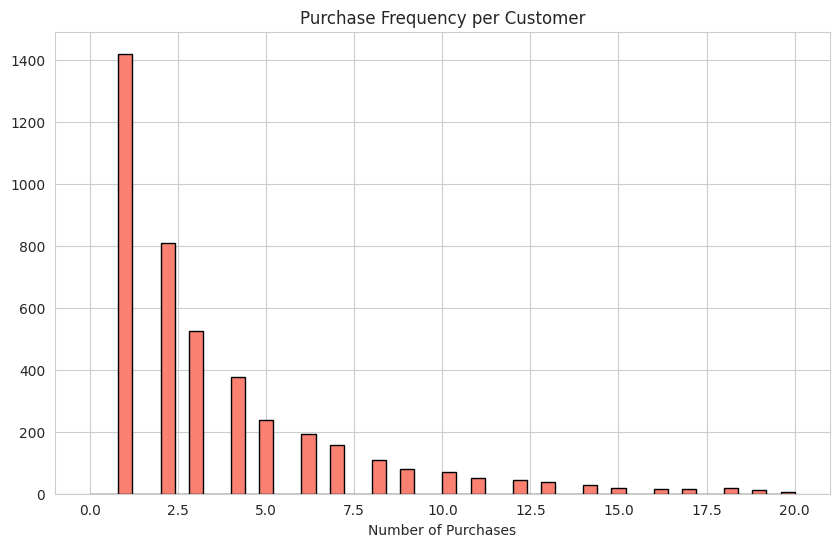%0A)

In \[10\]:

    # 5. FINAL REFLECTION
    # ------------------------------------------
    print("\n" + "="*40)
    print("FINAL SUMMARY")
    print("="*40)
    print("1. Seasonality: Revenue peaks in Q4 (Holiday Season).")
    print("2. Market: The UK is the dominant market (>90%).")
    print("3. Retention: Most customers are one-time buyers.")
    print("NEXT STEP: I will build a Churn Prediction Model.")

    ========================================
    FINAL SUMMARY
    ========================================
    1. Seasonality: Revenue peaks in Q4 (Holiday Season).
    2. Market: The UK is the dominant market (>90%).
    3. Retention: Most customers are one-time buyers.
    NEXT STEP: I will build a Churn Prediction Model.